In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
life_df = pd.read_csv("Data/cleaned_life_expectancy_df.csv")

In [12]:
numeric_df = life_df.select_dtypes(include=np.number)

numeric_df.drop(['year'], axis = 1)


## delete life expectancy at 60 dip and measles infant mortality bmi 

life_expectancy  life_expectancy_at_60  adult_mortality  \
0            47.33730               14.73400         383.5583   
1            48.19789               14.95963         372.3876   
2            49.42569               15.20010         354.5147   
3            50.50266               15.39144         343.2169   
4            51.52863               15.56860         333.8711   
...               ...                    ...              ...   
2936         64.49448               16.57977         209.2666   
2937         64.79716               16.64219         205.1459   
2938         65.10757               16.70787         200.8204   
2939         65.45008               16.77074         196.6613   
2940         65.79089               16.83024         192.7939   

      infant_mortality  age_1-4_mortality  alcohol   bmi  age_5-19_thinness  \
0              0.13798            0.02570  1.47439  21.7               11.0   
1              0.13367            0.02450  1.94025  21.8               10.9   
2              0.12832            0.02326  2.07512  21.9               10.7   
3              0.12204            0.02192  2.20275  22.0               10.5   
4              0.11570            0.02054  2.41274  22.2               10.3   
...                ...                ...      ...   ...                ...   
2936           0.05584            0.00485  6.29833  22.4                9.2   
2937           0.05535            0.00460  6.42186  22.6                9.1   
2938           0.05458            0.00440  6.64447  22.7                9.0   
2939           0.05346            0.00416  6.83826  22.8                8.9   
2940           0.05190            0.00399  7.11148  22.9                8.9   

      age_5-19_obesity  measles_vacc  polio_vacc  diphteria_vacc  \
0                  0.5          32.0        21.0            31.0   
1                  0.5          60.0        28.0            42.0   
2                  0.6          59.0        22.0            47.0   
3                  0.7          44.0        21.0            46.0   
4                  0.8          43.0        18.0            47.0   
...                ...           ...         ...             ...   
2936               3.1          72.0        78.0            79.0   
2937               3.5          82.0        86.0            87.0   
2938               3.8          87.0        88.0            88.0   
2939               4.2          83.0        80.0            81.0   
2940               4.7          66.0        66.0            66.0   

      basic_water_access  doctors_per_10000   gghe-d  che_gdp  population  \
0               41.14431            0.96700  1.11099  1.90860   16395.473   
1               42.25467            0.96700  2.04631  4.48352   16945.753   
2               43.37680            0.96700  1.30863  3.32946   17519.417   
3               44.36387            0.96700  1.46560  3.54797   18121.479   
4               45.35134            0.62100  1.68663  3.96720   18758.145   
...                  ...                ...      ...      ...         ...   
2936            72.07056            1.80000  0.43670  2.07638    6444.530   
2937            74.05544            4.49300  0.71266  2.39985    6541.304   
2938            76.02924            4.94900  0.68373  2.29846    6639.756   
2939            77.99142            3.77612  0.86391  2.45366    6741.164   
2940            79.94190            3.77612  0.76495  2.36087    6845.846   

         gni  
0     2530.0  
1     2630.0  
2     3180.0  
3     3260.0  
4     3560.0  
...      ...  
2936  4570.0  
2937  4980.0  
2938  5440.0  
2939  5810.0  
2940  6190.0  

[2941 rows x 18 columns]

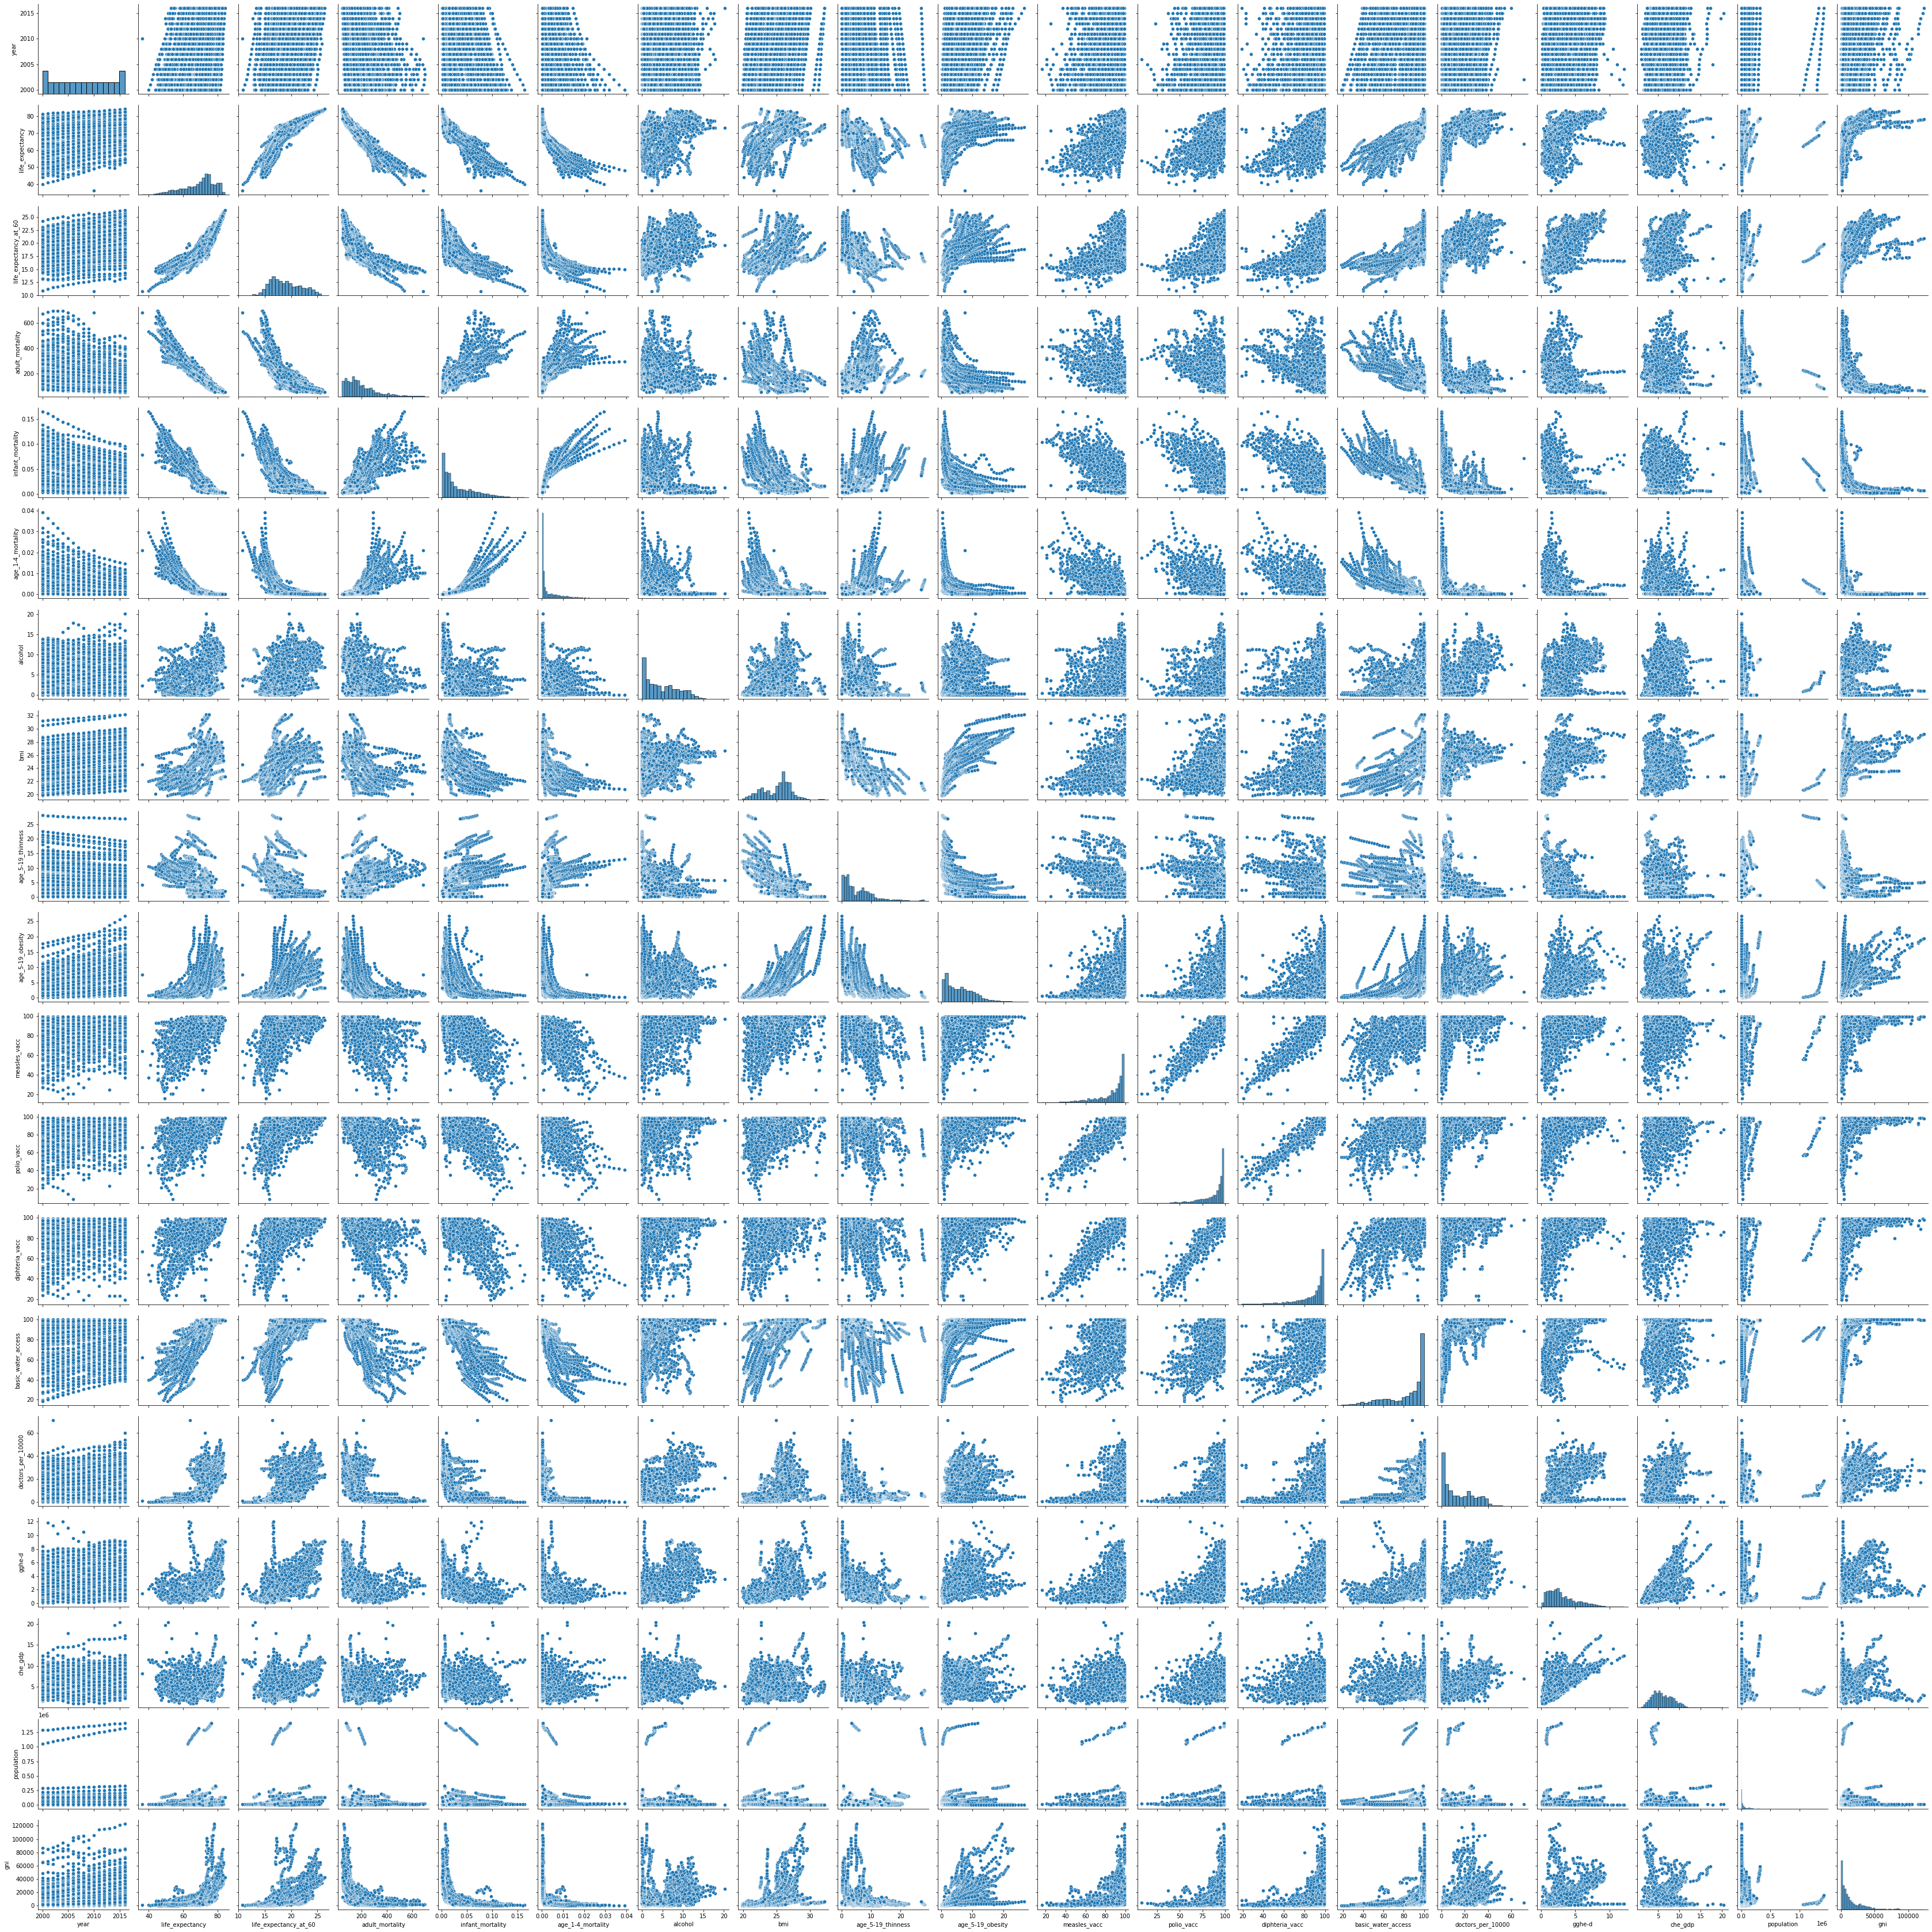

In [10]:
sns.pairplot(numeric_df)